##**Programação e Algoritmos II**

Prof. Alexandre Levada

###**Caminhos mínimos em grafos**

Estamos interessados agora em generalizar a Busca em Largura para obter caminhos mínimos em grafos em que as arestas podem ser ponderadas com custos não negativos.

Para isso, iremos generalizar nosso modelo matemático de grafo de modo a incluir uma função de custo para as arestas. Sendo assim, um grafo ponderado G passa a ser definido pela tupla $G = (V, E, w)$, onde $w: E \rightarrow R^{+}$ é uma função que associa a cada elemento do conjunto de arestas um custo não negativo.

**Def:** (Caminho ótimo)

Seja G = (V, E, w) com $w: E \rightarrow R^{+}$ uma função de custo para as arestas. Um caminho P* de $v_0$ a $v_n$ é ótimo se seu peso:

$$
w(P^*) = \sum_{i=0}^{n-1} w(v_i, v_{i+1}) = w(v_0, v_1) + w(v_1, v_2) + ... + w(v_{n-1}, v_n)
$$

é o menor possível (mínimo).

A base para o algoritmo de Dijkstra é a operação primitiva que relaxa as arestas do grafo. 

**Primitiva relax**

Iremos denotar por $\lambda(v)$ ou $v.d$ o custo estimado do menor caminho até o presente momento da raiz s até o vértice v. Então, relaxar a aresta (u, v) de peso w significa responder a seguinte pergunta:

É uma boa ideia passar pelo vértice u para chegar em v? Porque?

A figura a seguir ilustra duas situações distintas: uma em que relaxar a aresta produz um melhor caminho e outra em que relaxar a aresta mantém o caminho inalterado.

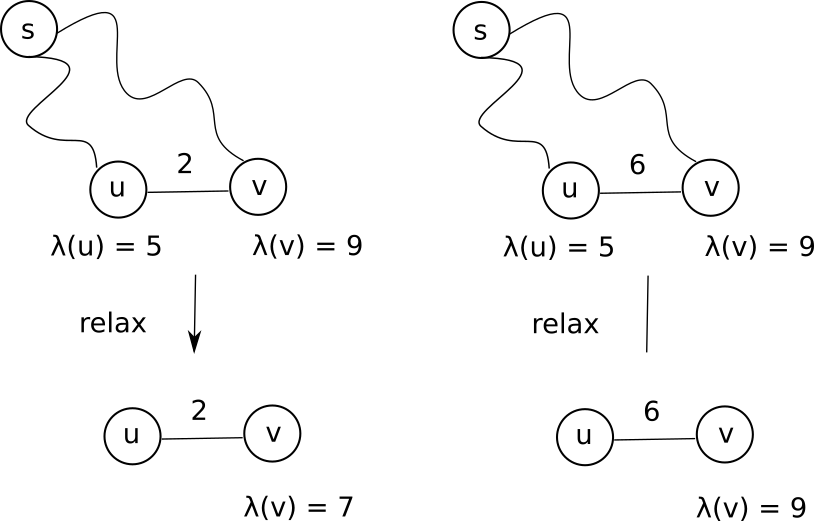



No primeiro caso, o custo atual para o vértice v é 9. Note que como o custo atual para o vértice u é 5 e o custo de atravessar a aresta (u, v) é igual a 2, é uma boa ideia passar por u para chegar em v.

Já no segundo caso, o custo atual para o vértice v é 9 e o custo atual para o vértice u é 5 também. Porém, o custo de atravessar a aresta (u, v) é 6, o que não traz nenhuma vantagem em termos de minimizar o caminho (pelo contrário, iria aumentar o caminho).

O pseudocódigo da primitiva relax é dado pela função a seguir.

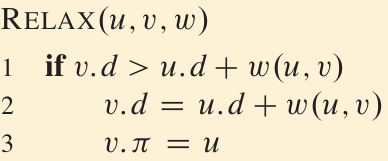

Note que a primitiva relax nunca aumenta o valor de $v.d$, sempre diminui ou mantém inalterado!

Explicação em vídeo: https://www.youtube.com/watch?v=Qv_E2o4U7Zo&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=36

Antes de apresentarmos o algoritmo de Dijkstra, iremos introduzir as principais variáveis utilizadas por ele.

**Definição das variáveis**

Q: fila de prioridades dos vértices (maior prioridade = menor $\lambda(v)$)

$\lambda(v)$ ou $v.d$ : menor custo até o momento para o caminho da raiz s até o vértice v 

$\pi(v)$ ou $v.\pi$ : predecessor de v na árvore de caminhos mínimos (onde estava quando descobrir menor caminho até v)

**PSEUDOCODIGO**

Primeiramente, iremos definir a função que inicializa as variáveis. Ela é responsável por atribuir custos iniciais infinitos a todos os vértices do grafo, com exceção da raiz s, que recebe custo zero.

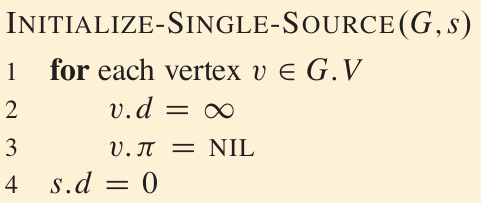




Em seguida, todos os vértices do grafo são inseridos na fila de prioridades. Note que inicialmente, todos possuem a prioridade mais baixa possível, com exceção da raiz que terá prioridade máxima dentre todos os demais.

O loop principal executa até que a fila esteja completamente vazia. Em cada iteração o vértice de menor distância até a raiz é removido da fila de prioridades. Imediatamente, ele é adicionado ao conjunto S dos vértices já finalizados e nesse moemento, tanto sua distância em relação a raiz s quanto seu predecessor não serão mais modificados. Em seguida, relaxamos cada uma das arestas incidentes a esse vértice v que saiu da fila e caso o o valor de $\lambda(v)$ seja diminuído, modificamos a prioridade de v na fila Q.

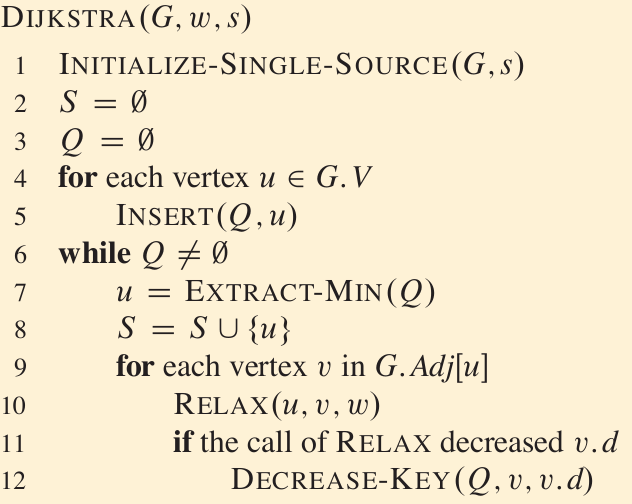

Explicação em vídeo: https://www.youtube.com/watch?v=zu_rDXlX_4c&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=37

**Algoritmos e suas estruturas de dados**

Busca em Largura (BFS) - FILA

Busca em Profundidade (DFS) - PILHA

Djikstra - FILA DE PRIORIDADES

A seguir, iremos mostrar o trace completo do algoritmo de Dijkstra em um exemplo ilustrativo.

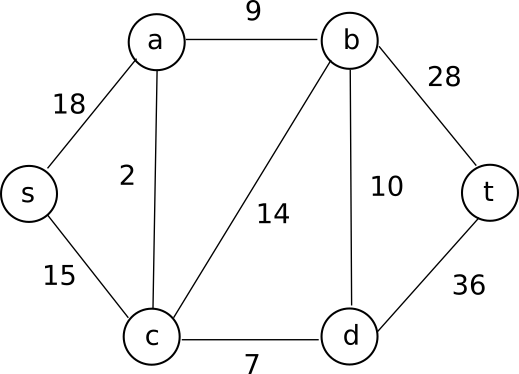



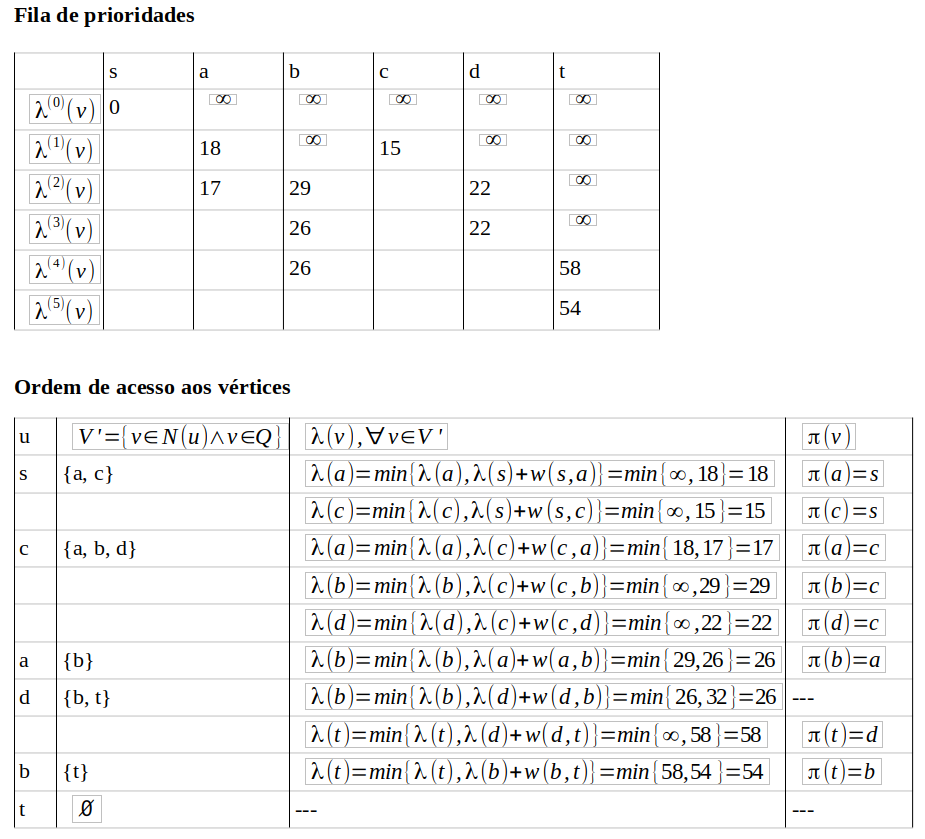

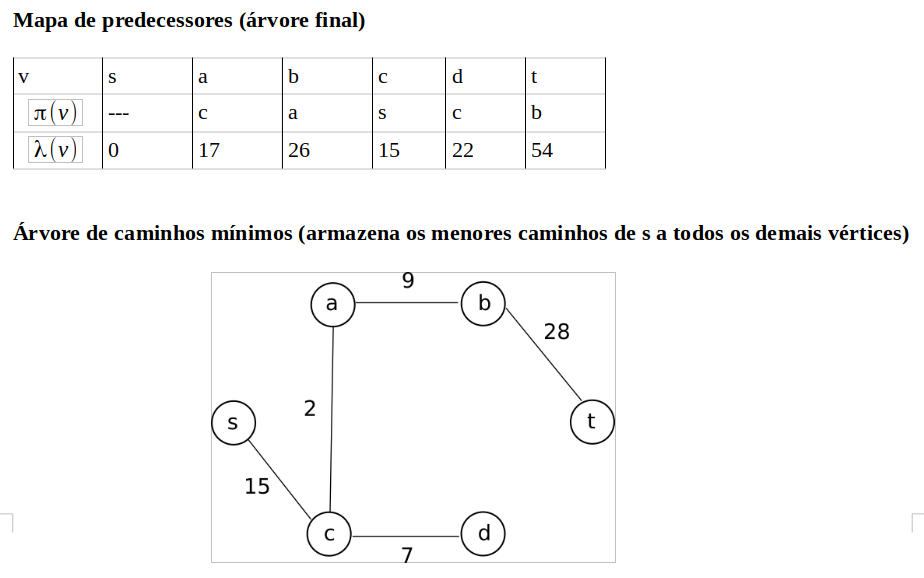

Explicação em vídeo: https://www.youtube.com/watch?v=O5nOJBWDTOs&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=38

A seguir iremos demonstrar a otimalidade do algoritmo de Dijkstra.

**Teorema:** O algoritmo de Dijkstra termina com $\lambda(v) = d(s, v)$ para todo $v \in V$, onde $d(s, v)$ é a distância geodésica.

Prova por contradição

Primeiramente, note que durante a execução do algoritmo de Dijkstra temos que $\lambda(v) \geq d(s, v)$ (*).

1. Suponha que u seja o primeiro vértice para o qual $\lambda(u) \neq d(s, u)$ quando u entra em S.

2. Então, $u \neq s$ pois senão $\lambda(s) = d(s, s) = 0$

3. Assim, existe um caminho $P_{su}$ pois senão $\lambda(u) = d(s, u) = \infty$. Portanto, existe um caminho mínimo $P_{su}^*$.

4. Antes de adicionar u a S, $P_{su}^*$ possui $s \in S$ e $u \in V-S$

5. Seja y o primeiro vértice em $P_{su}^*$ tal que $y \in V-S$ e seja x seu predecessor ($x \in S$)

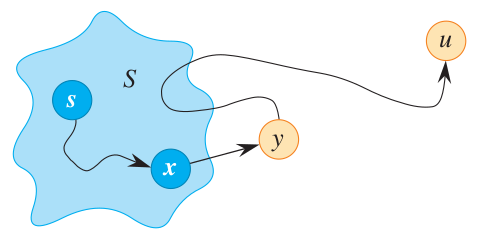

6. Como $x \in S$, $\lambda(x) = d(s, x)$ e no momento em que ele foi inserido a S, a aresta (x,y) foi relaxada, ou seja:

$$
\lambda(y) = \lambda(x) + w(x, y) = d(s, x) + w(x, y) = d(s, y)
$$

7. Mas y antecede a u no caminho e como $w: E \rightarrow R^{+}$ (pesos positivos), temos $d(s, y) \leq d(s, u)$ e portanto, combinando (6), (7) e (*), temos:

$$
\lambda(y) = d(s, y) \leq d(s, u) \leq \lambda(u)
$$

8. Mas como ambos y e u pertencem a $V-S$, quando u é escolhido para entrar em S temos $\lambda(u) \leq \lambda(y)$

9. Como $\lambda(y) \leq \lambda(u)$ e $\lambda(u) \leq \lambda(y)$ então temos que $\lambda(y) = \lambda(u)$, o que implica em:

$$
\lambda(y) = d(s, y) = d(s, u) = \lambda(u)
$$

o que gera uma contradição. Portanto, $nexists u \in V$ tal que $\lambda(u) \neq d(s, u)$ quando u entra em S.

Explicação em vídeo: https://www.youtube.com/watch?v=A3DNSsTFQLg&list=PL7OlISixQYm50wMkXCygCgymn1dVmc9sg&index=39

**Análise da complexidade**

Basicamente, há duas formas de implementar o algoritmode Dijkstra: uma onde G é representado pela matriz de adjacências e a fila de prioridades por um array (lista em Python) e outra em que o grafo G é representado pela lista de adjacências e a fila de prioridades por um heap binário (mesma estrutura do heapsort). Veremos a complexidade em cada uma das implementações:

1. *G = (V, E) representado por matriz de adjacências e fila de prioridades Q representada por um array (acesso direto)*

    a) A inicialização e a inserção dos vértices em Q é $O(n)$

    b) Loop while é executado n vezes (pois fila inicia cheia)

    c) Primitiva u = ExtractMin(Q) é $O(n)$ (pois é equivalente a encontrar o menor elemento em um array)

    d) a operação relax é $O(1)$, mas é realizada k vezes, onde $k = d(u)$

    e) a operação Decrease-Key é $O(1)$ (fila de prioridades é um array de acesso direto)

Portanto, o custo total é dado por:

$$
O(n) + O(n)*O(n) + (O(1) + O(1))*(d(v_1) + d(v_2) + ... + d(v_n))
$$

Pelo Handshaking Lema, a soma dos graus é igual a duas vezes o número de arestas, que é $O(m)$, temos:

$$
O(n) + O(n^2) + O(1)*O(m)
$$

Como o termo dominante é quadrático, e no pior caso o $m = O(n^2)$, temos que a complexidade do algoritmo de Dijkstra nessa implementação é $O(n^2)$.

2. *G = (V, E) representado por lista de adjacências e fila de prioridades Q representada por um heap binário*

    a) A inicialização e a inserção dos vértices em Q é $O(n)$

    b) Loop while é executado n vezes (pois fila inicia cheia)

    c) Primitiva u = ExtractMin(Q) é $O(log n)$ (devido a altura da árvore binária: heap)

    d) a operação relax é $O(1)$, mas é realizada k vezes, onde $k = d(u)$

    e) a operação Decrease-Key é $O(log n)$ (fila de prioridades é um heap binário não permite acesso direto)

Portanto, o custo total é dado por:

$$
O(n) + O(n)*O(log n) + (O(1) + O(log n))*(d(v_1) + d(v_2) + ... + d(v_n))
$$

Pelo Handshaking Lema, a soma dos graus é igual a duas vezes o número de arestas, que é $O(m)$, temos:

$$
O(n) + O(n log n) + O(1)*O(m) + O(m log n)
$$

Como os termos dominantes são log-lineares, a complexidade do algoritmo de Dijkstra nessa implementação fica $O((n + m) log n)$. Mas como na grande maioria das vezes trabalhamos com grafos conexos:

$$
m \geq n - 1
$$

ou seja, m domina n, o que nos leva a uma complexidade $O(m log n)$.

A análise da complexidade nos permite concluir que a implementação 1 (matriz de adjacências + array) é mais adequada para grafos mais densos (com um número muito grande de arestas) enquanto que a implementação 2 (lista de adjacências + heap binário) é mais adequada para grafos mais esparsos (com um menor número de arestas). Em resumo, se $m$ for $O(n^2)$, usar matriz de adjacências e array de acesso direto é a melhor opção.












Plotando grafo...


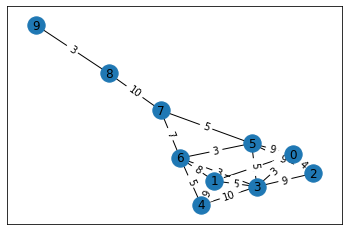

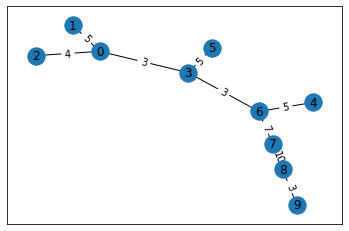

In [ ]:
# Adiciona bibliotecas auxiliares
import random
import networkx as nx
import matplotlib.pyplot as plt

# Extrai o vértice de menor lambda da fila Q
def extractMin(Q, H):
    # Enconrta o menor vértice de menor lambda
    u = Q[0]
    for node in Q:
        # O vértice u armazena o vértice de menor lambda até o momento
        if H.nodes[node]['lambda'] < H.nodes[u]['lambda']:
            u = node
    # Remove u da fila
    del Q[Q.index(u)]
    return u

def Dijkstra(G, s):
    # dicionário para armazenar o mapa de predecessores
    P = {} # estrutura de dados que mapeia uma chave a um valor
    # inicialização do algoritmo 
    for v in G.nodes():
        G.nodes[v]['lambda'] = float('inf')
    # custo para a raiz é 0
    G.nodes[s]['lambda'] = 0
    # iniciar fila Q com todos os vértices
    Q = list(G.nodes())
    # enquanto fila não estiver vazia
    while (len(Q) > 0):
        # obter o primeiro elemento da fila
        u = extractMin(Q, G)
        # para cada vertice adjacênte a u
        for v in G.neighbors(u):
            if (v in Q and G.nodes[v]['lambda'] > G.nodes[u]['lambda'] 
									+ G[u][v]['weight']):
                # atualizar custo de v
                G.nodes[v]['lambda']=G.nodes[u]['lambda']+G[u][v]['weight']
                # adicionar u como antecessor de v
                P[v] = u
                
    # retorna a lista de antecessores
    return P

if __name__ == '__main__':
    # Cria um grafo de exemplo
    G = nx.krackhardt_kite_graph()
    # Adicionando peso nas arestas
    for u, v in G.edges():
        G[u][v]['weight'] = random.randint(1, 10)
    print('Plotando grafo...')
    # Cria figura para plotagem
    plt.figure(1)
    # Há vários layouts, mas spring é um dos mais bonitos
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    # Exibir figura
    plt.show()
    # Aplicando Busca em Largura
    P = Dijkstra(G, 0)      # retorna as arestas que compõem a BFS_tree
    # Cria um grafo vaxio para árvore da busca em largura
    T = nx.Graph()
    # Inserir arestas em T
    T.add_edges_from([ (u, v) for u, v in P.items() ])
    # Obtém os pesos das arestas da árvore a partir de G
    for u, v in T.edges():
        T[u][v]['weight'] = G[u][v]['weight']
    # Cria figura para plotagem
    plt.figure(2) 
    # Define o layout
    pos = nx.spring_layout(T)
    # Plotar vertices de T
    nx.draw_networkx(T, pos, with_labels=True)
    # Plotar pesos das arestas
    labels = nx.get_edge_attributes(T, 'weight')
    nx.draw_networkx_edge_labels(T, pos, edge_labels=labels)
    # Exibir figura
    plt.show()

“Não trilhe apenas os caminhos já abertos. Por serem conhecidos eles nos levam somente até onde alguém já foi um dia.” 

(Alexander Graham Bell)